In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

In [ ]:
df=pd.read_csv('flightPrice.csv')

In [ ]:
df.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1.0,5335.0
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1.0,5899.0
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1.0,5801.0
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1.0,5794.0
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1.0,5955.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420548 entries, 0 to 420547
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    420548 non-null  object 
 1   Journey_day        420548 non-null  object 
 2   Airline            420548 non-null  object 
 3   Flight_code        420548 non-null  object 
 4   Class              420548 non-null  object 
 5   Source             420548 non-null  object 
 6   Departure          420548 non-null  object 
 7   Total_stops        420548 non-null  object 
 8   Arrival            420548 non-null  object 
 9   Destination        420547 non-null  object 
 10  Duration_in_hours  420547 non-null  float64
 11  Days_left          420547 non-null  float64
 12  Fare               420547 non-null  float64
dtypes: float64(3), object(10)
memory usage: 41.7+ MB


In [ ]:
df.describe()

,Duration_in_hours,Days_left,Fare
count,420547.000000,420547.000000,420547.000000
mean,12.244711,25.462367,22892.379011
std,7.400974,14.290190,20396.958530
min,0.750000,1.000000,1307.000000
25%,6.500000,13.000000,8769.000000
50%,11.250000,25.000000,13385.000000
75%,16.416700,38.000000,36577.000000
max,43.583300,50.000000,138951.000000


In [ ]:
df.shape

(420548, 13)

In [ ]:
df.isnull().sum()

Date_of_journey      0
Journey_day          0
Airline              0
Flight_code          0
Class                0
Source               0
Departure            0
Total_stops          0
Arrival              0
Destination          1
Duration_in_hours    1
Days_left            1
Fare                 1
dtype: int64

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
['Date_of_journey', 'Journey_day', 'Airline', 'Flight_code', 'Class', 'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420548 entries, 0 to 420547
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    420548 non-null  object 
 1   Journey_day        420548 non-null  object 
 2   Airline            420548 non-null  object 
 3   Flight_code        420548 non-null  object 
 4   Class              420548 non-null  object 
 5   Source             420548 non-null  object 
 6   Departure          420548 non-null  object 
 7   Total_stops        420548 non-null  object 
 8   Arrival            420548 non-null  object 
 9   Destination        420547 non-null  object 
 10  Duration_in_hours  420547 non-null  float64
 11  Days_left          420547 non-null  float64
 12  Fare               420547 non-null  float64
dtypes: float64(3), object(10)
memory usage: 41.7+ MB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Date_of_journey      0
Journey_day          0
Airline              0
Flight_code          0
Class                0
Source               0
Departure            0
Total_stops          0
Arrival              0
Destination          0
Duration_in_hours    0
Days_left            0
Fare                 0
dtype: int64

In [ ]:
df.columns

Index(['Date_of_journey', 'Journey_day', 'Airline', 'Flight_code', 'Class',
       'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination',
       'Duration_in_hours', 'Days_left', 'Fare'],
      dtype='object')

In [ ]:
for col in df.columns:
    if col == 'Airline':
        print(f"Feature Name : {col}")
        print('\n', df[col].unique())
        print('\n', "Total number of unique values are = ", len(df[col].unique()))
        print('\n', df[col].value_counts())



Feature Name : Airline

 ['SpiceJet' 'Indigo' 'GO FIRST' 'Air India' 'AirAsia' 'Vistara' 'AkasaAir'
 'AllianceAir' 'StarAir']

 Total number of unique values are =  9

 Airline
Vistara        213491
Air India      113933
Indigo          59752
AirAsia         15764
GO FIRST         9668
SpiceJet         5422
AkasaAir         2062
AllianceAir       393
StarAir            62
Name: count, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420547 entries, 0 to 420546
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    420547 non-null  object 
 1   Journey_day        420547 non-null  object 
 2   Airline            420547 non-null  object 
 3   Flight_code        420547 non-null  object 
 4   Class              420547 non-null  object 
 5   Source             420547 non-null  object 
 6   Departure          420547 non-null  object 
 7   Total_stops        420547 non-null  object 
 8   Arrival            420547 non-null  object 
 9   Destination        420547 non-null  object 
 10  Duration_in_hours  420547 non-null  float64
 11  Days_left          420547 non-null  float64
 12  Fare               420547 non-null  float64
dtypes: float64(3), object(10)
memory usage: 44.9+ MB


In [ ]:
#Converted Data Type For Date Of Journey DateTime
df['Date_of_journey'] = pd.to_datetime(df['Date_of_journey'])
df['Date_of_journey'] = pd.to_datetime(df['Date_of_journey'], format='%Y-%m-%d')


In [ ]:
# Creating Day and Month Feature from Date_of_journey
df["Day"] = df["Date_of_journey"].dt.day
df["Month"] = df["Date_of_journey"].dt.month

# Dropping "Date_of_Journey" column after creating new feature as it is not required
df.drop(columns=["Date_of_journey"], inplace=True)
df.head(5)


,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Day,Month
0,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1.0,5335.0,16,1
1,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1.0,5899.0,16,1
2,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1.0,5801.0,16,1
3,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1.0,5794.0,16,1
4,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1.0,5955.0,16,1


In [ ]:
#Encoding Some Columns using OneHot Encoding Techninque
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
columns_to_encode = ['Class', 'Source','Airline','Journey_day','Destination']

# Fit and transform the specified columns
one_hot_encoded_data = one_hot_encoder.fit_transform(df[columns_to_encode])

# Create a DataFrame with the one-hot encoded data
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_data, columns=one_hot_encoder.get_feature_names_out(columns_to_encode))

# Dropping  original columns after encoding as it is no longer required
df.drop(columns=columns_to_encode, inplace=True)

# Concatenate original DataFrame with the one-hot encoded DataFrame
df = pd.concat([df, one_hot_encoded_df], axis=1)

# Display the DataFrame after one-hot encoding
df.head()



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Flight_code,Departure,Total_stops,Arrival,Duration_in_hours,Days_left,Fare,Day,Month,Class_Economy,...,Journey_day_Sunday,Journey_day_Thursday,Journey_day_Tuesday,Journey_day_Wednesday,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai
0,SG-8169,After 6 PM,non-stop,After 6 PM,2.0833,1.0,5335.0,16,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6E-2519,After 6 PM,non-stop,Before 6 AM,2.3333,1.0,5899.0,16,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,G8-354,After 6 PM,non-stop,Before 6 AM,2.1667,1.0,5801.0,16,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,SG-8709,After 6 PM,non-stop,After 6 PM,2.0833,1.0,5794.0,16,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,AI-805,After 6 PM,non-stop,After 6 PM,2.1667,1.0,5955.0,16,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Function to encode using label encoder
def encode_and_map(df, column_name, order):
    # Initialize the label encoder with the defined order
    label_encoder = LabelEncoder()
    label_encoder.fit(order)

    # Apply label encoding to the specified column
    encoded_column_name = f"{column_name}_encoded"
    df[encoded_column_name] = label_encoder.transform(df[column_name])

    # Define the mapping dictionary
    mapping = dict(zip(label_encoder.transform(order), order))
    print(f"Mapping for {column_name}: {mapping}")

    # Map encoded values back to their corresponding labels
    decoded_column_name = f"{column_name}_time"
    df[decoded_column_name] = df[encoded_column_name].map(mapping)

    # Drop the original columns after encoding as it is no longer required
    df.drop(columns=[column_name], inplace=True)

    return df

departure_order = ['Before 6 AM', '6 AM - 12 PM', '12 PM - 6 PM', 'After 6 PM']
arrival_order = ['Before 6 AM', '6 AM - 12 PM', '12 PM - 6 PM', 'After 6 PM']

# Apply encoding and mapping function for Departure
df = encode_and_map(df, 'Departure', departure_order)

# Apply encoding and mapping function for Arrival
df = encode_and_map(df, 'Arrival', arrival_order)

df.head()

Mapping for Departure: {3: 'Before 6 AM', 1: '6 AM - 12 PM', 0: '12 PM - 6 PM', 2: 'After 6 PM'}
Mapping for Arrival: {3: 'Before 6 AM', 1: '6 AM - 12 PM', 0: '12 PM - 6 PM', 2: 'After 6 PM'}


,Flight_code,Total_stops,Duration_in_hours,Days_left,Fare,Day,Month,Class_Economy,Class_First,Class_Premium Economy,...,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai,Departure_encoded,Departure_time,Arrival_encoded,Arrival_time
0,SG-8169,non-stop,2.0833,1.0,5335.0,16,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2,After 6 PM,2,After 6 PM
1,6E-2519,non-stop,2.3333,1.0,5899.0,16,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2,After 6 PM,3,Before 6 AM
2,G8-354,non-stop,2.1667,1.0,5801.0,16,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2,After 6 PM,3,Before 6 AM
3,SG-8709,non-stop,2.0833,1.0,5794.0,16,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2,After 6 PM,2,After 6 PM
4,AI-805,non-stop,2.1667,1.0,5955.0,16,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2,After 6 PM,2,After 6 PM


In [ ]:
# Encoding Total Stops using Label Encoded
encoded_stops = LabelEncoder().fit_transform(df["Total_stops"])
df["Total_stops_encoded"] = LabelEncoder().fit_transform(df["Total_stops"])
df["Total_stops"] = encoded_stops

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420547 entries, 0 to 420546
Data columns (total 41 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Flight_code            420547 non-null  object 
 1   Total_stops            420547 non-null  int64  
 2   Duration_in_hours      420547 non-null  float64
 3   Days_left              420547 non-null  float64
 4   Fare                   420547 non-null  float64
 5   Day                    420547 non-null  int32  
 6   Month                  420547 non-null  int32  
 7   Class_Economy          420547 non-null  float64
 8   Class_First            420547 non-null  float64
 9   Class_Premium Economy  420547 non-null  float64
 10  Source_Bangalore       420547 non-null  float64
 11  Source_Chennai         420547 non-null  float64
 12  Source_Delhi           420547 non-null  float64
 13  Source_Hyderabad       420547 non-null  float64
 14  Source_Kolkata         420547 non-null  f

In [ ]:
#Dropping Departure_time  and Arrival_time

df.drop(columns=['Flight_code','Departure_time','Arrival_time'], axis=1, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420547 entries, 0 to 420546
Data columns (total 38 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Total_stops            420547 non-null  int64  
 1   Duration_in_hours      420547 non-null  float64
 2   Days_left              420547 non-null  float64
 3   Fare                   420547 non-null  float64
 4   Day                    420547 non-null  int32  
 5   Month                  420547 non-null  int32  
 6   Class_Economy          420547 non-null  float64
 7   Class_First            420547 non-null  float64
 8   Class_Premium Economy  420547 non-null  float64
 9   Source_Bangalore       420547 non-null  float64
 10  Source_Chennai         420547 non-null  float64
 11  Source_Delhi           420547 non-null  float64
 12  Source_Hyderabad       420547 non-null  float64
 13  Source_Kolkata         420547 non-null  float64
 14  Source_Mumbai          420547 non-null  f

In [ ]:
#Creating Correlation Heatmap
plt.figure(figsize=(200, 50))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
df.corr()

,Total_stops,Duration_in_hours,Days_left,Fare,Day,Month,Class_Economy,Class_First,Class_Premium Economy,Source_Bangalore,...,Journey_day_Wednesday,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai,Departure_encoded,Arrival_encoded,Total_stops_encoded
Total_stops,1.000000,-0.404039,0.005005,-0.243501,0.000299,0.003674,0.116743,0.036094,-0.010378,-0.017417,...,-0.000097,-0.002978,-0.022396,0.047166,-0.041548,-0.031228,0.048896,0.015492,-0.005222,1.000000
Duration_in_hours,-0.404039,1.000000,-0.037230,0.183832,0.019029,-0.037049,-0.201780,-0.013932,0.168289,0.011119,...,-0.000866,-0.020240,0.043382,-0.081035,0.026230,0.054837,-0.047154,0.099587,-0.023685,-0.404039
Days_left,0.005005,-0.037230,1.000000,-0.088911,-0.266415,0.883675,-0.006948,-0.000518,-0.014357,0.000905,...,-0.041774,0.003739,0.010535,-0.018826,0.012322,-0.005853,-0.001509,-0.006284,-0.002914,0.005005
Fare,-0.243501,0.183832,-0.088911,1.000000,0.031400,-0.081444,-0.700758,0.034334,-0.142310,0.005670,...,0.006782,0.005070,0.014114,-0.044195,-0.014455,0.043769,0.024888,-0.005400,-0.011672,-0.243501
Day,0.000299,0.019029,-0.266415,0.031400,1.000000,-0.685223,0.003477,0.000115,0.002881,-0.000453,...,-0.150633,0.001181,0.002902,0.004074,-0.003100,0.002116,-0.005423,0.002950,0.001601,0.000299
Month,0.003674,-0.037049,0.883675,-0.081444,-0.685223,1.000000,-0.006740,-0.000433,-0.012133,0.001115,...,0.041096,0.002354,0.006409,-0.015848,0.010663,-0.005245,0.001253,-0.006059,-0.002898,0.003674
Class_Economy,0.116743,-0.201780,-0.006948,-0.700758,0.003477,-0.006740,1.000000,-0.020706,-0.489771,-0.012622,...,-0.002245,-0.001553,-0.000634,0.020048,-0.003390,0.030418,-0.026997,-0.013121,0.030357,0.116743
Class_First,0.036094,-0.013932,-0.000518,0.034334,0.000115,-0.000433,-0.020706,1.000000,-0.008102,-0.008508,...,-0.000083,-0.007785,-0.006827,0.004099,0.011752,-0.006705,0.008976,0.004027,0.013221,0.036094
Class_Premium Economy,-0.010378,0.168289,-0.014357,-0.142310,0.002881,-0.012133,-0.489771,-0.008102,1.000000,0.016238,...,-0.002148,0.000848,-0.004947,-0.022440,0.013407,-0.035873,0.017105,0.006144,-0.027502,-0.010378
Source_Bangalore,-0.017417,0.011119,0.000905,0.005670,-0.000453,0.001115,-0.012622,-0.008508,0.016238,1.000000,...,-0.000866,-0.193377,-0.018084,0.064764,0.048717,0.069141,0.039304,0.085909,-0.008945,-0.017417


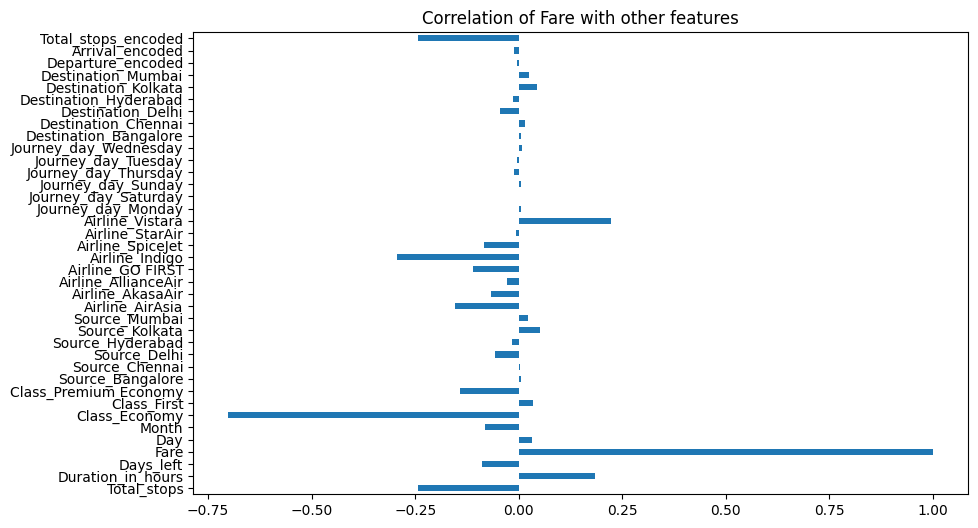

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation for the 'Fare' column as a bar chart
correlation_matrix['Fare'].plot(kind='barh', figsize=(10, 6))
plt.title("Correlation of Fare with other features")
plt.show()

In [ ]:
X1 = df.drop(columns=['Fare'])
y1 = df.Fare

In [ ]:
X1.head(3)

,Total_stops,Duration_in_hours,Days_left,Day,Month,Class_Economy,Class_First,Class_Premium Economy,Source_Bangalore,Source_Chennai,...,Journey_day_Wednesday,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai,Departure_encoded,Arrival_encoded,Total_stops_encoded
0,2,2.0833,1.0,16,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2,2
1,2,2.3333,1.0,16,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,3,2
2,2,2.1667,1.0,16,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,3,2


In [ ]:
y1.head(3)

0    5335.0
1    5899.0
2    5801.0
Name: Fare, dtype: float64

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42)

In [ ]:
# Scaling the feature
scaler = StandardScaler()

# Fit the scaler to the training data
X1_train_scaled = scaler.fit_transform(X1_train)

# Transform the test data using the same scaler
X1_test_scaled = scaler.transform(X1_test)


In [ ]:
# model training
dt_gen_1 = DecisionTreeRegressor()
dt_gen_1.fit(X1_train, y1_train)

DecisionTreeRegressor()

In [ ]:
# model testing
y1_pred_dt = dt_gen_1.predict(X1_test)

In [ ]:
# model performance
print("Train Score = ",dt_gen_1.score(X1_train, y1_train))
print("Test Score = ",dt_gen_1.score(X1_test, y1_test))

Train Score =  0.9987705040355938
Test Score =  0.9166657915914462


In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y1_test, y1_pred_dt))
print('MSE:', metrics.mean_squared_error(y1_test, y1_pred_dt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred_dt)))
print('R2 Score:', metrics.r2_score(y1_test, y1_pred_dt))

MAE: 2520.0297358050293
MSE: 34604873.24790733
RMSE: 5882.590691855701
R2 Score: 0.9166657915914462
